# Analysis of Homology mapping for mouse and rat to identify human ortholgs.

In [8]:
#Load data and Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Load the data
mouse_data = pd.read_csv('../data/processed/mouse/human_ortholog_mapped.csv')
rat_data = pd.read_csv('../data/processed/rat/human_ortholog_mapped.csv')

mouse_int_df = pd.read_csv('../data/processed/mouse/aligned_interfaces.csv')
rat_int_df = pd.read_csv('../data/processed/rat/aligned_interfaces.csv')


In [2]:
# Analyze number of orthologs identified for each dataset.

# Mouse data numbers:
n_total_mouse = len(mouse_data)
n_orthologs_mouse = len(mouse_data[mouse_data["human_ortholog_id"].notna()])
n_no_orthologs_mouse = len(mouse_data[mouse_data["human_ortholog_id"].isna()])

print(f"Mouse data:")
print(f"Total phosphorylation sites: {n_total_mouse}")
print(f"Orthologs identified: {n_orthologs_mouse}")
print(f"No orthologs identified: {n_no_orthologs_mouse}")
print(f"Percentage of phosphorylation sites with orthologs: {n_orthologs_mouse / n_total_mouse * 100:.2f}%")

# Rat data numbers:
n_total_rat = len(rat_data)
n_orthologs_rat = len(rat_data[rat_data["human_ortholog_id"].notna()])
n_no_orthologs_rat = len(rat_data[rat_data["human_ortholog_id"].isna()])

print(f"\nRat data:")
print(f"Total phosphorylation sites: {n_total_rat}")
print(f"Orthologs identified: {n_orthologs_rat}")
print(f"No orthologs identified: {n_no_orthologs_rat}")
print(f"Percentage of phosphorylation sites with orthologs: {n_orthologs_rat / n_total_rat * 100:.2f}%")



Mouse data:
Total phosphorylation sites: 30442
Orthologs identified: 29354
No orthologs identified: 1088
Percentage of phosphorylation sites with orthologs: 96.43%

Rat data:
Total phosphorylation sites: 23004
Orthologs identified: 20235
No orthologs identified: 2769
Percentage of phosphorylation sites with orthologs: 87.96%


In [3]:
# Count protein IDs present in interface files

# Load interface files
mouse_interfaces = pd.read_csv('../data/interactome_insider/M_musculus_interfacesHQ.csv')
human_interfaces = pd.read_csv('../data/interactome_insider/H_sapiens_interfacesHQ.csv')

# Get unique protein IDs from mouse data
unique_mouse_protein_ids = set(mouse_data['protein_id'].dropna().unique())
unique_mouse_human_ortholog_ids = set(mouse_data['human_ortholog_id'].dropna().unique())

# Get unique protein IDs from interface files
mouse_interface_p1 = set(mouse_interfaces['P1'].dropna().unique())
mouse_interface_p2 = set(mouse_interfaces['P2'].dropna().unique())
mouse_interface_all = mouse_interface_p1.union(mouse_interface_p2)

human_interface_p1 = set(human_interfaces['P1'].dropna().unique())
human_interface_p2 = set(human_interfaces['P2'].dropna().unique())
human_interface_all = human_interface_p1.union(human_interface_p2)

# Count matches
# Mouse protein_id in M_musculus_interfacesHQ.csv (P1 or P2)
mouse_protein_ids_in_interfaces = unique_mouse_protein_ids.intersection(mouse_interface_all)
n_mouse_protein_ids_in_interfaces = len(mouse_protein_ids_in_interfaces)

# Human ortholog_id in H_sapiens_interfacesHQ.csv (P1 or P2)
human_ortholog_ids_in_interfaces = unique_mouse_human_ortholog_ids.intersection(human_interface_all)
n_human_ortholog_ids_in_interfaces = len(human_ortholog_ids_in_interfaces)

# Print results
print("Interactome Insider Interface File Analysis")
print(f"\nMouse protein IDs (from human_ortholog_mapped.csv):")
print(f"  Total unique protein_id values: {len(unique_mouse_protein_ids)}")
print(f"  Found in M_musculus_interfacesHQ.csv (P1 or P2): {n_mouse_protein_ids_in_interfaces}")
print(f"  Percentage: {n_mouse_protein_ids_in_interfaces / len(unique_mouse_protein_ids) * 100:.2f}%")

print(f"\nHuman ortholog IDs (from human_ortholog_mapped.csv):")
print(f"  Total unique human_ortholog_id values: {len(unique_mouse_human_ortholog_ids)}")
print(f"  Found in H_sapiens_interfacesHQ.csv (P1 or P2): {n_human_ortholog_ids_in_interfaces}")
print(f"  Percentage: {n_human_ortholog_ids_in_interfaces / len(unique_mouse_human_ortholog_ids) * 100:.2f}%")


Interactome Insider Interface File Analysis

Mouse protein IDs (from human_ortholog_mapped.csv):
  Total unique protein_id values: 6015
  Found in M_musculus_interfacesHQ.csv (P1 or P2): 618
  Percentage: 10.27%

Human ortholog IDs (from human_ortholog_mapped.csv):
  Total unique human_ortholog_id values: 5682
  Found in H_sapiens_interfacesHQ.csv (P1 or P2): 4889
  Percentage: 86.04%


In [ ]:
# Total mouse and rat proteins with interaction interface identified by interactome insider data

aligned_mouse_int_count = mouse_int_df['interface_alignment_percent'].count()
aligned_rat_int_count = rat_int_df['interface_alignment_percent'].count()
total_mouse_proteins = len(mouse_int_df)
total_rat_proteins = len(rat_int_df)

print(f"Total mouse protein interfaces aligned: {aligned_mouse_int_count}")
print(f"Total rat protein interfaces aligned: {aligned_rat_int_count}")
print(f"Total mouse proteins: {total_mouse_proteins}")
print(f"Total rat proteins: {total_rat_proteins}")

# Calculate percentages
mouse_interface_percentage = (aligned_mouse_int_count / total_mouse_proteins) * 100
rat_interface_percentage = (aligned_rat_int_count / total_rat_proteins) * 100

print(f"Percentage of mouse proteins with aligned interfaces: {mouse_interface_percentage:.2f}%")
print(f"Percentage of rat proteins with aligned interfaces: {rat_interface_percentage:.2f}%")



Total mouse protein interfaces aligned: 4575
Total rat protein interfaces aligned: 4327
Total mouse proteins: 9194
Total rat proteins: 8405
Percentage of mouse proteins with aligned interfaces: 49.76%
Percentage of rat proteins with aligned interfaces: 51.48%


In [6]:
# Average interface alignment percentage for mouse and rat
average_mouse_interface_alignment = mouse_int_df['interface_alignment_percent'].mean()
average_rat_interface_alignment = rat_int_df['interface_alignment_percent'].mean()

print(f"Average interface alignment percentage for mouse: {average_mouse_interface_alignment:.2f}%")
print(f"Average interface alignment percentage for rat: {average_rat_interface_alignment:.2f}%")

# Number of aligned interfaces above 90%, 80%, 70%, 60%, 50% for mouse and rat

# Mouse
mouse_90_to_100 = mouse_int_df['interface_alignment_percent'].loc[mouse_int_df['interface_alignment_percent'] >= 90].count()
mouse_80_to_90 = mouse_int_df['interface_alignment_percent'].loc[(mouse_int_df['interface_alignment_percent'] < 90) & (mouse_int_df['interface_alignment_percent'] >= 80)].count()
mouse_70_to_80 = mouse_int_df['interface_alignment_percent'].loc[(mouse_int_df['interface_alignment_percent'] < 80) & (mouse_int_df['interface_alignment_percent'] >= 70)].count()
mouse_60_to_70 = mouse_int_df['interface_alignment_percent'].loc[(mouse_int_df['interface_alignment_percent'] < 70) & (mouse_int_df['interface_alignment_percent'] >= 60)].count()
mouse_50_to_60 = mouse_int_df['interface_alignment_percent'].loc[(mouse_int_df['interface_alignment_percent'] < 60) & (mouse_int_df['interface_alignment_percent'] >= 50)].count()

# Rat
rat_90_to_100 = rat_int_df['interface_alignment_percent'].loc[rat_int_df['interface_alignment_percent'] >= 90].count()
rat_80_to_90 = rat_int_df['interface_alignment_percent'].loc[(rat_int_df['interface_alignment_percent'] < 90) & (rat_int_df['interface_alignment_percent'] >= 80)].count()
rat_70_to_80 = rat_int_df['interface_alignment_percent'].loc[(rat_int_df['interface_alignment_percent'] < 80) & (rat_int_df['interface_alignment_percent'] >= 70)].count()
rat_60_to_70 = rat_int_df['interface_alignment_percent'].loc[(rat_int_df['interface_alignment_percent'] < 70) & (rat_int_df['interface_alignment_percent'] >= 60)].count()
rat_50_to_60 = rat_int_df['interface_alignment_percent'].loc[(rat_int_df['interface_alignment_percent'] < 60) & (rat_int_df['interface_alignment_percent'] >= 50)].count()

#print
print("\nNumber of aligned interfaces above 90%, 80%, 70%, 60%, 50% for Mouse:")
print(f"90%-100%: {mouse_90_to_100}")
print(f"80%-90%: {mouse_80_to_90}")
print(f"70%-80%: {mouse_70_to_80}")
print(f"60%-70%: {mouse_60_to_70}")
print(f"50%-60%: {mouse_50_to_60}")

print("\nNumber of aligned interfaces above 90%, 80%, 70%, 60%, 50% for Rat:")
print(f"90%-100%: {rat_90_to_100}")
print(f"80%-90%: {rat_80_to_90}")
print(f"70%-80%: {rat_70_to_80}")
print(f"60%-70%: {rat_60_to_70}")
print(f"50%-60%: {rat_50_to_60}")

Average interface alignment percentage for mouse: 94.75%
Average interface alignment percentage for rat: 93.54%

Number of aligned interfaces above 90%, 80%, 70%, 60%, 50% for Mouse:
90%-100%: 3907
80%-90%: 350
70%-80%: 133
60%-70%: 67
50%-60%: 45

Number of aligned interfaces above 90%, 80%, 70%, 60%, 50% for Rat:
90%-100%: 3534
80%-90%: 397
70%-80%: 162
60%-70%: 91
50%-60%: 42


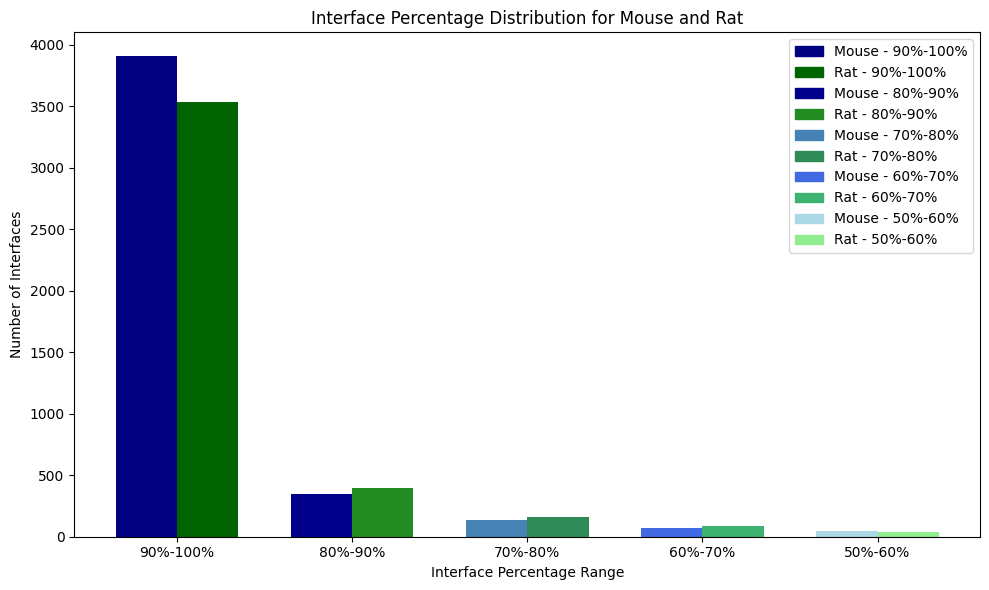

In [10]:
# Graph of interface percentage distribution for mouse and rat

# Mouse
mouse_percentages = [mouse_90_to_100, mouse_80_to_90, mouse_70_to_80, mouse_60_to_70, mouse_50_to_60]
percent_categories = ['90%-100%', '80%-90%', '70%-80%', '60%-70%', '50%-60%']
rat_percentages = [rat_90_to_100, rat_80_to_90, rat_70_to_80, rat_60_to_70, rat_50_to_60]

mouse_colors = ['navy', 'darkblue', 'steelblue', 'royalblue', 'lightblue']
rat_colors = ['darkgreen', 'forestgreen', 'seagreen', 'mediumseagreen', 'lightgreen']

# Create bar plot for mouse and rat
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(percent_categories))
width = 0.35

for i in range(len(percent_categories)):
    ax.bar(x[i] - width/2, mouse_percentages[i], width, color=mouse_colors[i])
    ax.bar(x[i] + width/2, rat_percentages[i], width, color=rat_colors[i])

legend_elements = []
for i, category in enumerate(percent_categories):
    legend_elements.append(mpatches.Patch(color=mouse_colors[i], label=f'Mouse - {category}'))
    legend_elements.append(mpatches.Patch(color=rat_colors[i], label=f'Rat - {category}'))

ax.set_xlabel('Interface Percentage Range')
ax.set_ylabel('Number of Interfaces')
ax.set_title('Interface Percentage Distribution for Mouse and Rat')
ax.set_xticks(x)
ax.set_xticklabels(percent_categories)
ax.legend(handles=legend_elements, loc='upper right')
plt.tight_layout()
plt.show()






# Looking at proteins with multiple interaction partners, do their interface residues overlap?

In [ ]:
cleaned_mouse_int_df = mouse_int_df[mouse_int_df['interface_alignment_percent'] >= 50].copy()
cleaned_rat_int_df = rat_int_df[rat_int_df['interface_alignment_percent'] >= 50].copy()
print(f"Total number of mouse interfaces: {len(cleaned_mouse_int_df)}")
print(f"Total number of rat interfaces: {len(cleaned_rat_int_df)}")
print(f"\nTotal mouse proteins with interfaces: {len(cleaned_mouse_int_df['protein_id'].unique())}")
print(f"Total rat proteins with interfaces: {len(cleaned_rat_int_df['protein_id'].unique())}")

def parse_position_list(position_str):
    """Convert a string like "[33-35,60,62]" into a list of integers."""
    if position_str is None or (isinstance(position_str, float) and pd.isna(position_str)):
        return []
    
    position_str = str(position_str).strip()
    if not position_str:
        return []
    
    # Remove enclosing brackets if present
    if position_str.startswith('[') and position_str.endswith(']'):
        position_str = position_str[1:-1]
    
    if not position_str:
        return []
    
    positions = []
    for part in position_str.split(','):
        part = part.strip()
        if not part:
            continue
        if '-' in part:
            try:
                start, end = part.split('-', 1)
                start = int(start)
                end = int(end)
                if start <= end:
                    positions.extend(range(start, end + 1))
                else:
                    positions.extend(range(end, start + 1))
            except ValueError:
                pass
        else:
            try:
                positions.append(int(part))
            except ValueError:
                pass
    
    return sorted(set(positions))  # Remove duplicates and sort


def expand_ires_format(ires_str):
    """Convert IRES from compact format to expanded comma-separated format."""
    if pd.isna(ires_str) or not ires_str:
        return None
    
    positions = parse_position_list(ires_str)
    if not positions:
        return None
    
    return ','.join(map(str, positions))


# Apply to matched_IRES column
cleaned_mouse_int_df['matched_IRES'] = cleaned_mouse_int_df['matched_IRES'].apply(expand_ires_format)
cleaned_rat_int_df['matched_IRES'] = cleaned_rat_int_df['matched_IRES'].apply(expand_ires_format)

# Convert matched_IRES to set
cleaned_mouse_int_df['matched_IRES'] = cleaned_mouse_int_df['matched_IRES'].apply(lambda x: set(map(int, x.split(','))))
cleaned_rat_int_df['matched_IRES'] = cleaned_rat_int_df['matched_IRES'].apply(lambda x: set(map(int, x.split(','))))

# Count overlappign residues between mouse and rat

def summarize_interactions(df):
    # df must have: protein_id, matched_IRES (as sets)
    
    results = []
    
    for protein_id, group in df.groupby("protein_id"):
        sets = list(group["matched_IRES"])
        
        # Calculate core residues (intersection of all sets)
        if len(sets) > 1:
            core = set.intersection(*sets)
        else:
            core = sets[0] if sets else set()
        
        # Calculate all residues (union of all sets)
        full = set.union(*sets) if sets else set()
        
        # Count frequency of each residue across partners
        freq = {}
        for s in sets:
            for r in s:
                freq[r] = freq.get(r, 0) + 1
        
        # Calculate residues present in 2+ interactions
        residues_2plus = {r for r, count in freq.items() if count >= 2}
        
        results.append({
            "protein_id": protein_id,
            "core_residues": core,
            "residues_2plus": residues_2plus,
            "all_residues": full,
            "residue_frequency": freq,
            "n_partners": len(sets)
        })
    
    # Convert to DataFrame
    summary = pd.DataFrame(results)
    
    return summary


# run for each dataset
mouse_summary = summarize_interactions(cleaned_mouse_int_df)
rat_summary = summarize_interactions(cleaned_rat_int_df)

# make a filtered dataframe of columns with more than 1 partner
mouse_multi_partner = mouse_summary[mouse_summary["n_partners"] > 1]
rat_multi_partner = rat_summary[rat_summary["n_partners"] > 1]

# Save to CSV
mouse_summary.to_csv('../data/processed/mouse/mouse_interaction_summary.csv', index=False)
rat_summary.to_csv('../data/processed/rat/rat_interaction_summary.csv', index=False)
mouse_multi_partner.to_csv('../data/processed/mouse/mouse_multi_partner_summary.csv', index=False)
rat_multi_partner.to_csv('../data/processed/rat/rat_multi_partner_summary.csv', index=False)


print(f"\nNumber of mouse proteins with multiple interaction partners: {len(mouse_multi_partner)}")
print(f"Number of rat proteins with multiple interaction partners: {len(rat_multi_partner)}")

# proteins with similarities in interface residues in 2+ interactors




Total number of mouse interfaces: 4502
Total number of rat interfaces: 4226

Total mouse proteins with interfaces: 1817
Total rat proteins with interfaces: 1672

Number of mouse proteins with multiple interaction partners: 873
Number of rat proteins with multiple interaction partners: 814
1
